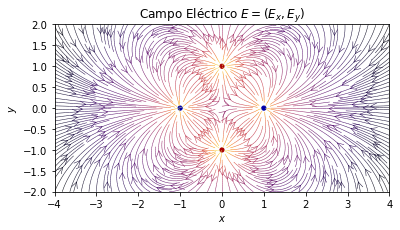

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """
    Calcula el campo eléctrico vectorial generado por una 
    carga q en el punto r0.
    
    Args:
        q : carga eléctrica
        r0: tupla que indica la posición de la carga eléctrica.
        x,y: grid para calcular el campo eléctrico.
    Return:
        El campo eléctrico vectorial E=(Ex,Ey)
    """
    r3 = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / r3, q * (y - r0[1]) / r3

def generaCargas(nq):
    """
    Crea multipolos con un número de cargas nq de signo 
    alternante igualmente espaciadas en el círculo 
    unitario.
    
    Args:
        nq : número total de cargas.

    Return:
    """
    cg = []
    for i in range(nq):
        q = i%2 * 2 - 1
        x = np.cos(2*np.pi*i/nq)
        y = np.sin(2*np.pi*i/nq)
        cg.append((q,(x,y)))
    return cg

# Creación del dominio y la malla
nx, ny = 64, 64
lx1,lx2 = -4, 4
ly1,ly2 = -2, 2
xg,yg = np.meshgrid(np.linspace(lx1, lx2, nx), np.linspace(ly1, ly2, ny))

nq = 2**2
cargas = generaCargas(nq)

# Crea el campo vectorial E = (Ex,Ey) sumando los campos
# eléctricos que genera cada carga.
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for carga in cargas:
    ex, ey = E(*carga, x=xg, y=yg)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Mapa de color para dibujar las líneas de corriente.
mapa_colores = 2 * np.log(np.hypot(Ex, Ey))

ax.streamplot(xg, yg, Ex, Ey, color=mapa_colores, linewidth=0.5, 
              cmap=plt.cm.inferno, density=3, arrowstyle='->', 
              arrowsize=1.5)

# Agregamos círculos en las posiciones de las cargas
colores = {True: '#aa0000', False: '#0000aa'}
for q, pos in cargas:
    ax.add_artist(Circle(pos, 0.05, color=colores[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(lx1,lx2)
ax.set_ylim(ly1,ly2)
ax.set_aspect('equal')
plt.title('Campo Eléctrico $E = (E_x, E_y)$')
#plt.savefig('Electrico.pdf')
plt.show()